# WEATHER DATASET - classification
 Elena Leonelli

**The problem:**

At this link a .csv file containing some weather data (temperature, humidity, air pressure, etc.) can be found. It is asked to develop a **classification algorithm** capable of predicting the label contained in the "RainTomorrow" column - i.e., whether it rained on the following day - by making use of the values contained in the remaining columns (or in a convenient subset of them).

Execution.

*   *Preprocess* the data in order to make them more apt for the subsequent analysis
*   Choose one or more *algorithms* to carry out said classification task
*   Pick one or more *metrics* to assess how algorithms generalise to unseen data, which algorithm displays the best performances and the overall quality of the analysis
*   Prepare a few slides to present the work, its outcomes and to justify the different choices

The code and the slides should be made available some days before the interview, so that the overall quality of the work can be evaluated by our team in advance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, chi2

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_theme(style="whitegrid")

In [124]:
#the first column contains the indexes, the 'Date' column contains datetime objects
link = 'https://raw.githubusercontent.com/leonellielena/Weather_dataset/main/weather.csv'
data_raw = pd.read_csv(link, index_col=0, parse_dates=['Date']) 

In [5]:
data_raw.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
data_raw.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [7]:
data_raw.shape

(142193, 23)

In [8]:
data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


# Visualizing the dataset

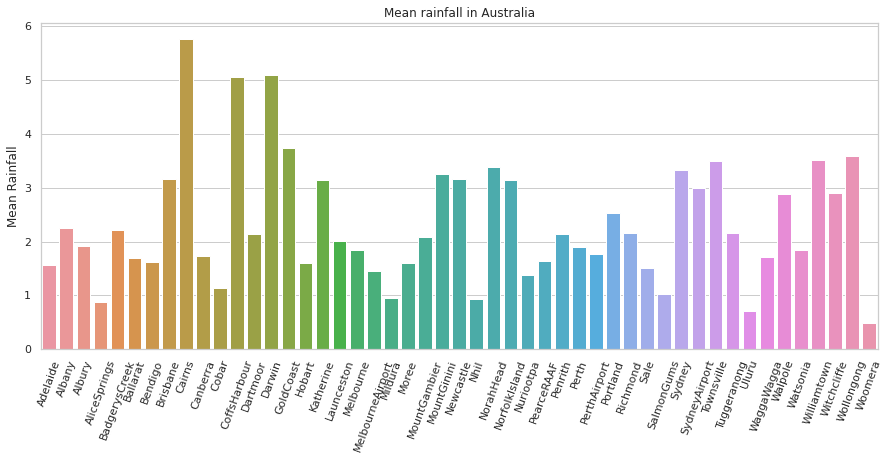

In [114]:
#rainiest australian cities
values = data_raw.groupby('Location')['Rainfall'].mean()
f, ax = plt.subplots(figsize=( 15,6))
sns.barplot(x=values.index, y=values, ax=ax )
ax.set(title='Mean rainfall in Australia', xlabel='',ylabel='Mean Rainfall');

ax.set_xticklabels(ax.get_xticklabels(), rotation=70);


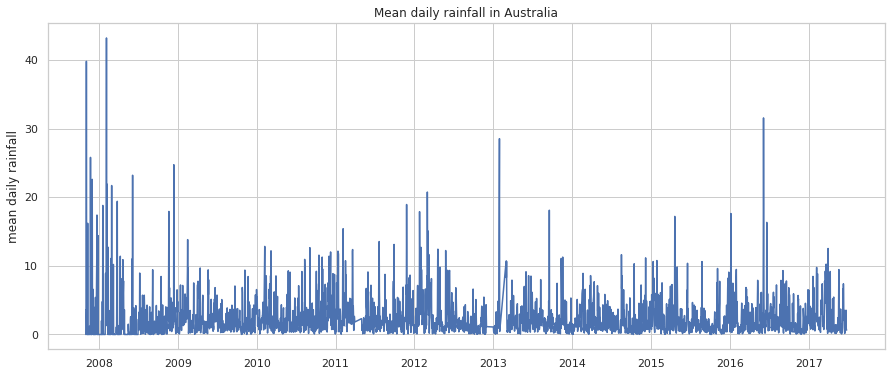

In [115]:
plt.figure(figsize=(15,6))

data_grouped_all = data_raw.groupby(pd.Grouper(key='Date', axis=0, freq='D'))['Rainfall'].mean()
ax = sns.lineplot(data_grouped_all.index,data_grouped_all)
ax.set(xlabel='', ylabel='mean daily rainfall', title='Mean daily rainfall in Australia');


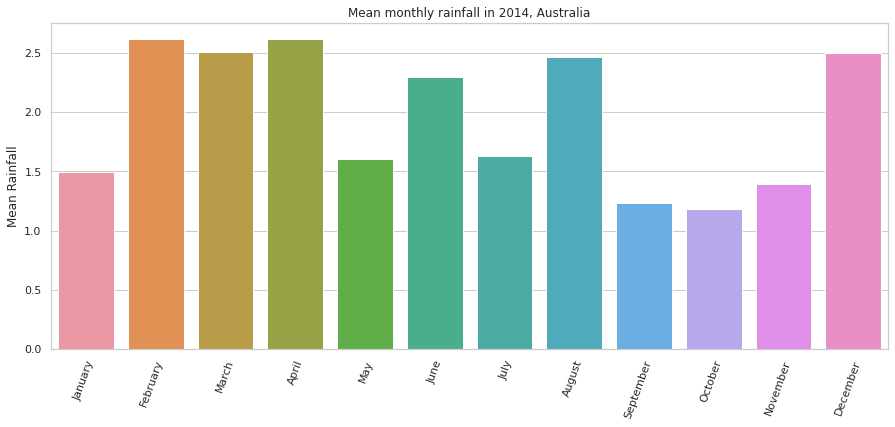

In [116]:
plt.figure(figsize=(15,6))
data_grouped = data_raw.loc[data_raw['Date'].between('2014-01-01','2014-12-31')].groupby(pd.Grouper(key='Date', axis=0, freq='M'))['Rainfall'].mean()

ax = sns.barplot(data_grouped.index,data_grouped)
ax.set(ylabel='Mean Rainfall',xlabel='',title='Mean monthly rainfall in 2014, Australia')
ax.set_xticklabels(labels=data_grouped.index.month_name(), rotation=70, rotation_mode="anchor", ha="right");


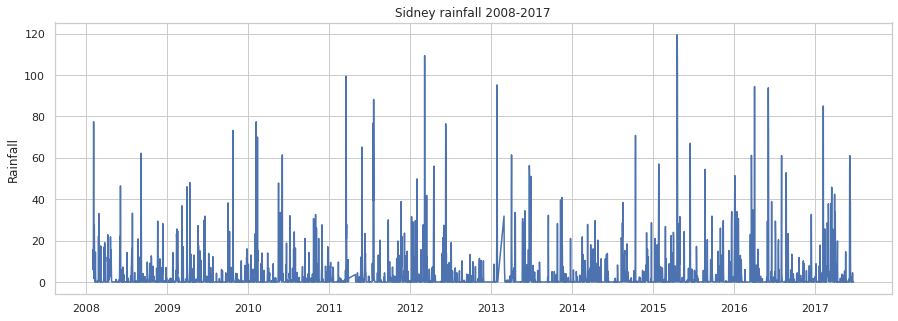

In [117]:
sydney_rainfall = data_raw[data_raw['Location'] == 'Sydney'].loc[:,['Date','Rainfall']]

ax, fig = plt.subplots(figsize=(15,5))
ax = sns.lineplot(sydney_rainfall['Date'],sydney_rainfall['Rainfall'])
ax.set(title='Sidney rainfall 2008-2017', xlabel='', ylabel='Rainfall');


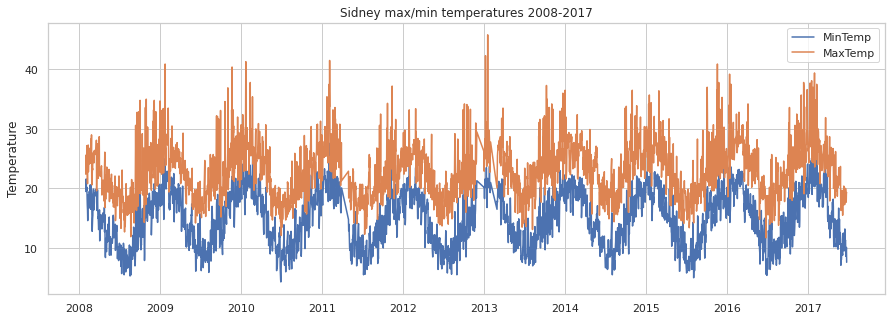

In [118]:
sydney_temperature = data_raw[data_raw['Location'] == 'Sydney'].loc[:,['Date','MinTemp','MaxTemp']]

ax, fig = plt.subplots(figsize=(15,5))
ax = sns.lineplot(sydney_temperature['Date'],sydney_temperature['MinTemp'],label='MinTemp')
ax = sns.lineplot(sydney_temperature['Date'],sydney_temperature['MaxTemp'],label='MaxTemp')
ax.set(title='Sidney max/min temperatures 2008-2017', xlabel='', ylabel='Temperature');
ax.legend;


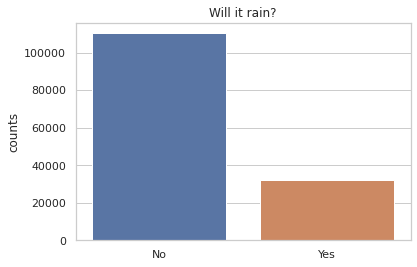

In [119]:
ax = sns.barplot(
    x=data_raw['RainTomorrow'].value_counts().index,
    y=data_raw['RainTomorrow'].value_counts())

ax.set(xlabel='', ylabel='counts',title='Will it rain?');


# Preprocessing




## Missing values

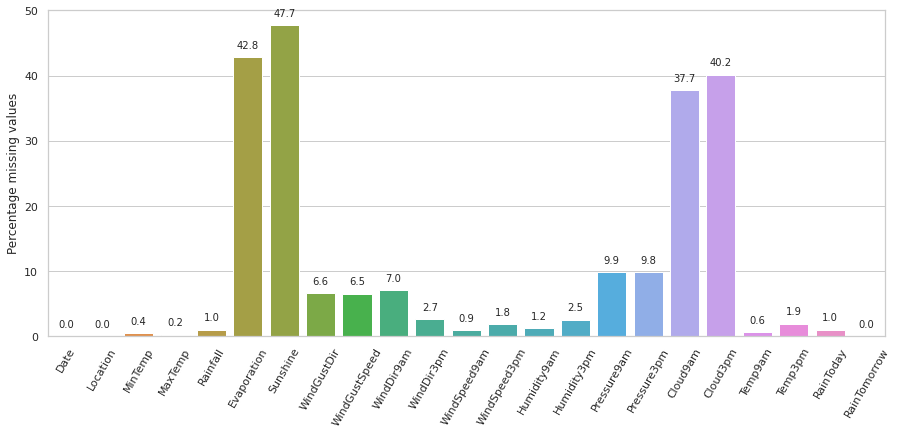

In [120]:
values= data_raw.isna().sum()/data_raw.shape[0]*100 #percentage of Na values in dataframe for each column
f, ax = plt.subplots(figsize=( 15,6))
sns.barplot(x=values.index, y=values, ax=ax )
ax.set(ylabel='Percentage missing values', xlabel='');
ax.set_xticklabels(ax.get_xticklabels(), rotation=60);

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 12), 
                   textcoords = 'offset points')


In [16]:
#remove columns Evaporation, Sunshine, Cloud9am, Cloud9pm because around 40% missing values
data=data_raw.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'],axis=1)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [17]:
data.shape

(142193, 19)

In [18]:
#now I delete all rows with at least one NaN for categorical variables (Wind direction and RainToday)

data=data.dropna(subset=['WindGustDir','WindDir3pm','WindDir9am','RainToday'],axis=0)
print('Now I work with {:.0f}% of the initial rows'.format(data.shape[0]/data_raw.shape[0]*100))


Now I work with 87% of the initial rows


In [19]:
data = data.fillna(data.mean(numeric_only=True))

In [20]:
#How many NaNs now?
data.isna().sum().sum()

0

In [21]:
data.shape

(123710, 19)

## Categorical data: RainToday and RainTomorrow from yes/no to 1/0

In [22]:
#From yes/no to 1/0

data['RainToday']=data['RainToday'].replace({'No': 0, 'Yes': 1})
data['RainTomorrow']=data['RainTomorrow'].replace({'No': 0, 'Yes': 1})

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


## Categorical data: wind direction with dummy variables (onehotencoder)

In [23]:
# create dummy variables
data = pd.get_dummies(data, columns=['WindGustDir','WindDir9am','WindDir3pm'], drop_first=True)

In [24]:
data.shape

(123710, 61)

## Location e Data

In [25]:
#removing data and location (I want a general model)
data_analysis=data.drop(['Date','Location'],axis=1)

# Feature selection

## Correlations
I want to remove redundancies.

In [26]:
data_numerical = data_analysis.iloc[:,:13]
data_numerical.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0


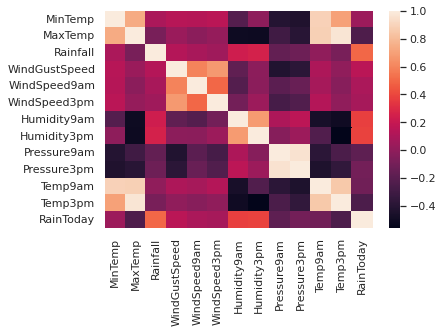

In [121]:
correlation = data_numerical.corr()

sns.heatmap(correlation);#uses pearson correlation method


**Temperatures**\
I create two more variables (differences), and then I evaluate the correlation with the target to choose which feature take.

In [28]:
temperatures_df = data_numerical.loc[:,['MinTemp','MaxTemp','Temp9am','Temp3pm']]
temperatures_df['MaxMinDiff'] = temperatures_df['MaxTemp']-temperatures_df['MinTemp']
temperatures_df['DayDiff'] = temperatures_df['Temp3pm']-temperatures_df['Temp9am']
temperatures_df['RainTomorrow'] = data_analysis['RainTomorrow']
temperatures_df.head()

,MinTemp,MaxTemp,Temp9am,Temp3pm,MaxMinDiff,DayDiff,RainTomorrow
0,13.4,22.9,16.9,21.8,9.5,4.9,0
1,7.4,25.1,17.2,24.3,17.7,7.1,0
2,12.9,25.7,21.0,23.2,12.8,2.2,0
3,9.2,28.0,18.1,26.5,18.8,8.4,0
4,17.5,32.3,17.8,29.7,14.8,11.9,0


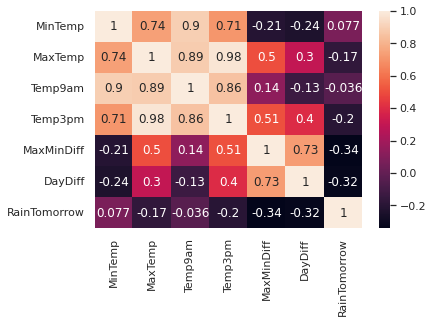

In [123]:
sns.heatmap(temperatures_df.corr(),annot=True);


This shows that the two new variables are more correlated to the target (in absolute value) than the others. I choose to keep MaxMinDiff as new feature, while excluding all the others.


**Wind Speed**\
As before, I create one more variables (difference from morning and afternoon wind speed), and then I evaluate the correlation with the target to choose which feature take.

In [30]:
wind_df = data_numerical.loc[:,['WindGustSpeed','WindSpeed9am','WindSpeed3pm']]
wind_df['WindDiff'] = wind_df['WindSpeed3pm']-wind_df['WindSpeed9am']
wind_df['RainTomorrow'] = data_analysis['RainTomorrow']
wind_df.head()

,WindGustSpeed,WindSpeed9am,WindSpeed3pm,WindDiff,RainTomorrow
0,44.0,20.0,24.0,4.0,0
1,44.0,4.0,22.0,18.0,0
2,46.0,19.0,26.0,7.0,0
3,24.0,11.0,9.0,-2.0,0
4,41.0,7.0,20.0,13.0,0


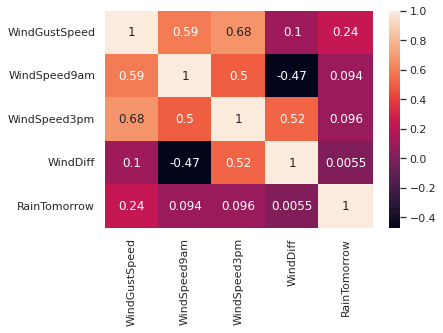

In [31]:
sns.heatmap(wind_df.corr(),annot=True);

In this case, the new variable is not correlated with the target: WindGustSpeed is the most correlated.

**Humidity**\
As before, I create one more variables (difference from morning and afternoon wind speed), and then I evaluate the correlation with the target to choose which feature take.

In [32]:
humidity_df = data_numerical.loc[:,['Humidity9am','Humidity3pm']]
humidity_df['HumidityDiff'] = humidity_df['Humidity9am']-humidity_df['Humidity3pm']
humidity_df['RainTomorrow'] = data_analysis['RainTomorrow']
humidity_df.head()

,Humidity9am,Humidity3pm,HumidityDiff,RainTomorrow
0,71.0,22.0,49.0,0
1,44.0,25.0,19.0,0
2,38.0,30.0,8.0,0
3,45.0,16.0,29.0,0
4,82.0,33.0,49.0,0


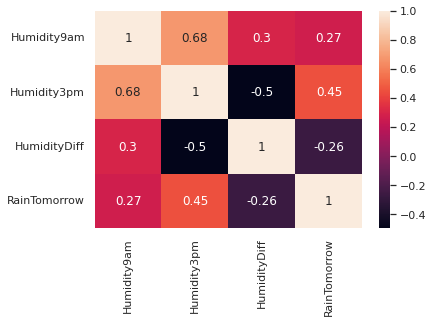

In [33]:
sns.heatmap(humidity_df.corr(),annot=True);

In this case, the new variable is not the most correlated with the target: Humidity3pm is the most correlated.

**Pressure**\
As before, I create one more variables (difference from morning and afternoon wind speed), and then I evaluate the correlation with the target to choose which feature take.

In [34]:
pressure_df = data_numerical.loc[:,['Pressure9am','Pressure3pm']]
pressure_df['PressureDiff'] = pressure_df['Pressure9am']-pressure_df['Pressure3pm']
pressure_df['RainTomorrow'] = data_analysis['RainTomorrow']
pressure_df.head()

,Pressure9am,Pressure3pm,PressureDiff,RainTomorrow
0,1007.7,1007.1,0.6,0
1,1010.6,1007.8,2.8,0
2,1007.6,1008.7,-1.1,0
3,1017.6,1012.8,4.8,0
4,1010.8,1006.0,4.8,0


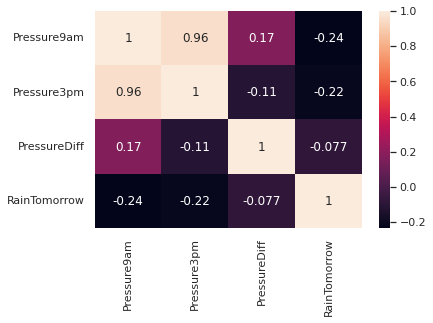

In [35]:
sns.heatmap(pressure_df.corr(),annot=True);

In this case, the new variable is not the most correlated with the target: Pressure9am is the most correlated.

## Selected features

In [36]:
x_dataset = data_analysis.drop(['MinTemp','MaxTemp','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure3pm','Temp9am','Temp3pm','RainTomorrow'],axis=1)
x_dataset['MaxMinDiff'] = temperatures_df['MaxMinDiff']

y_dataset = data_analysis['RainTomorrow']

In [37]:
x_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall,123710.0,2.375661,8.528039,0.0000,0.0,0.000000,0.8,367.6
WindGustSpeed,123710.0,40.685280,13.388636,7.0000,31.0,39.000000,48.0,135.0
Humidity3pm,123710.0,50.848406,20.839429,0.0000,36.0,51.000000,65.0,100.0
Pressure9am,123710.0,1017.398144,6.765371,980.5000,1013.2,1017.398144,1021.7,1041.0
RainToday,123710.0,0.224363,0.417164,0.0000,0.0,0.000000,0.0,1.0
WindGustDir_ENE,123710.0,0.060230,0.237913,0.0000,0.0,0.000000,0.0,1.0
WindGustDir_ESE,123710.0,0.055177,0.228327,0.0000,0.0,0.000000,0.0,1.0
WindGustDir_N,123710.0,0.066615,0.249356,0.0000,0.0,0.000000,0.0,1.0
WindGustDir_NE,123710.0,0.052429,0.222892,0.0000,0.0,0.000000,0.0,1.0
WindGustDir_NNE,123710.0,0.047927,0.213612,0.0000,0.0,0.000000,0.0,1.0


In [38]:
#0-1 rescaling
x_dataset_norm = (x_dataset-x_dataset.min())/(x_dataset.max()-x_dataset.min())
x_dataset_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
Rainfall,123710.0,0.006463,0.023199,0.0,0.000000,0.000000,0.002176,1.0
WindGustSpeed,123710.0,0.263166,0.104599,0.0,0.187500,0.250000,0.320312,1.0
Humidity3pm,123710.0,0.508484,0.208394,0.0,0.360000,0.510000,0.650000,1.0
Pressure9am,123710.0,0.609887,0.111824,0.0,0.540496,0.609887,0.680992,1.0
RainToday,123710.0,0.224363,0.417164,0.0,0.000000,0.000000,0.000000,1.0
WindGustDir_ENE,123710.0,0.060230,0.237913,0.0,0.000000,0.000000,0.000000,1.0
WindGustDir_ESE,123710.0,0.055177,0.228327,0.0,0.000000,0.000000,0.000000,1.0
WindGustDir_N,123710.0,0.066615,0.249356,0.0,0.000000,0.000000,0.000000,1.0
WindGustDir_NE,123710.0,0.052429,0.222892,0.0,0.000000,0.000000,0.000000,1.0
WindGustDir_NNE,123710.0,0.047927,0.213612,0.0,0.000000,0.000000,0.000000,1.0


In [39]:
sel_10 = SelectKBest(chi2, k=10)
sel_10.fit_transform(x_dataset_norm, y_dataset)
sel_10.get_feature_names_out(x_dataset_norm.columns)

array(['Rainfall', 'WindGustSpeed', 'Humidity3pm', 'RainToday',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NNW',
       'WindDir9am_SE', 'WindDir3pm_NW', 'MaxMinDiff'], dtype=object)

In [40]:
x_dataset_def = x_dataset_norm[sel_10.get_feature_names_out(x_dataset_norm.columns)]
x_dataset_def.head()

,Rainfall,WindGustSpeed,Humidity3pm,RainToday,WindDir9am_ESE,WindDir9am_N,WindDir9am_NNW,WindDir9am_SE,WindDir3pm_NW,MaxMinDiff
0,0.001632,0.289062,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.392584
1,0.000000,0.289062,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.622114
2,0.000000,0.304688,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.484956
3,0.000000,0.132812,0.16,0.0,0.0,0.0,0.0,1.0,0.0,0.652905
4,0.002720,0.265625,0.33,0.0,0.0,0.0,0.0,0.0,1.0,0.540939


# Classification models


## Creating training and test datasets

In [41]:
#train test split after shuffle
X_train, X_test, y_train, y_test = train_test_split(x_dataset_def, y_dataset, test_size=0.2, random_state=72, shuffle=True)

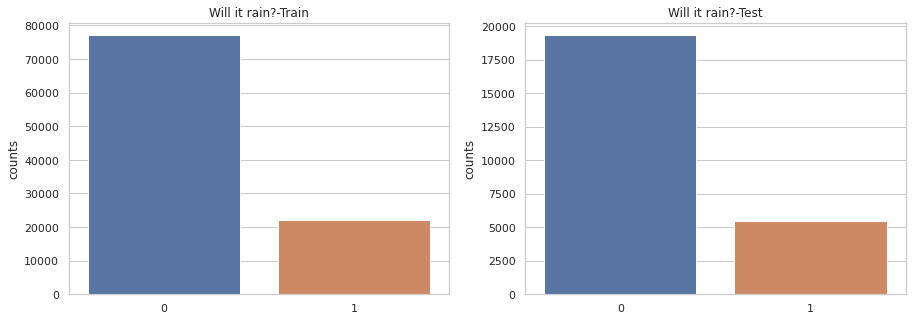

In [48]:
#proportions between classes are maintained
fig,ax=plt.subplots(1,2,figsize=(15,5))

sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts(),ax=ax[0])
ax[0].set(xlabel='', ylabel='counts',title='Will it rain?-Train');

sns.barplot(x=y_test.value_counts().index, y=y_test.value_counts(), ax=ax[1])
ax[1].set(xlabel='', ylabel='counts',title='Will it rain?-Test');

## Logistic Regression with weights

In [52]:
ratio_0_1 = y_train.value_counts()[0]/y_train.value_counts()[1]
print('The ratio of non-rainy days over rainy ones is {:.2f}'.format(ratio_0_1))

The ratio of non-rainy days over rainy ones is 3.51


In [88]:
weights = {0:1., 1:ratio_0_1} #to balance classes

model1 = LogisticRegression(solver='lbfgs', class_weight=weights, penalty='l2')
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred1)


model2 = LogisticRegression(solver='lbfgs')
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred2)

print('Accuracy with class weights: {:.2f}% \nAccuracy without class weights: {:.2f}%'.format(accuracy_1*100, accuracy_2*100))

Accuracy with class weights: 77.37% 
Accuracy without class weights: 83.97%


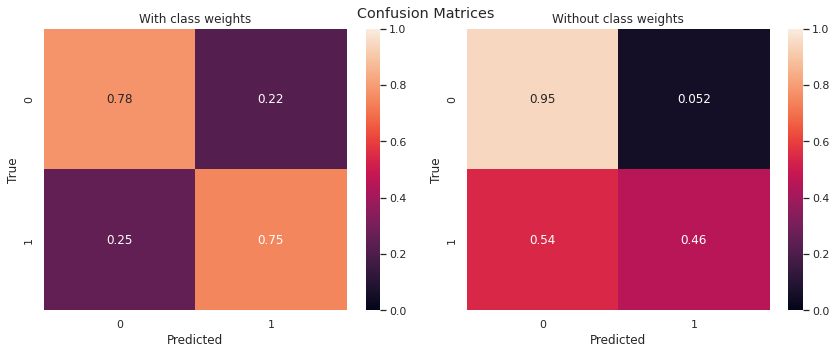

In [113]:
# confusion matrix

fig, ax = plt.subplots(1,2, figsize=(12,5))
cm1 = confusion_matrix(y_test, y_pred1, normalize='true')
sns.heatmap(cm1,annot=True, vmin=0, vmax=1, ax=ax[0])
ax[0].set_title('With class weights')
ax[0].set(xlabel='Predicted', ylabel='True')

cm2 = confusion_matrix(y_test, y_pred2,normalize='true')
sns.heatmap(cm2,annot=True, vmin=0, vmax=1, ax=ax[1])
ax[1].set_title('Without class weights')
ax[1].set(xlabel='Predicted', ylabel='True')

fig.suptitle('Confusion Matrices')
plt.tight_layout()
plt.savefig('metrics_1.pdf')

In [55]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84     19311
           1       0.49      0.75      0.59      5431

    accuracy                           0.77     24742
   macro avg       0.70      0.76      0.72     24742
weighted avg       0.82      0.77      0.79     24742



In [56]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     19311
           1       0.71      0.46      0.55      5431

    accuracy                           0.84     24742
   macro avg       0.79      0.70      0.73     24742
weighted avg       0.83      0.84      0.83     24742



Accuracy is not a good metrics: better looking at the confusion matrix!

## Neural Network

In [57]:
#pytorch
import torch
import torch.nn as nn
import torch.optim as optim


In [58]:
! pip install skorch
import skorch
from skorch import NeuralNetBinaryClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 155 kB 5.0 MB/s 


In [77]:
class NN_Class(nn.Module):
    
    def __init__(self, Ni=10, Nh1=32, Nh2=16, No=1):

        super().__init__()
        
        print('Network initialized')
        self.fc1 = nn.Linear(in_features=Ni, out_features=Nh1, bias=True)
        self.fc2 = nn.Linear(in_features=Nh1, out_features=Nh2, bias=True)
        self.out = nn.Linear(in_features=Nh2, out_features=No)
        self.act = nn.ReLU()
        
    def forward(self, x):
        x = x
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.out(x)
        return x

In [78]:
torch.manual_seed(46)

nn_classifier = NeuralNetBinaryClassifier(
    module = NN_Class,
    batch_size = 128,
    max_epochs=10,
    lr=0.1,
    optimizer=torch.optim.SGD,
    criterion=torch.nn.BCEWithLogitsLoss, #default one
    criterion__pos_weight=torch.Tensor([ratio_0_1]),
    verbose = 1
)

nn_classifier.fit(X_train.values.astype(np.float32),y_train.values.astype(np.float32))

Network initialized
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.8452       0.7966        0.7751  2.6660
      2        0.7705       0.8009        0.7633  2.4979
      3        0.7651       0.8020        0.7610  1.4146
      4        0.7628       0.7994        0.7587  1.4398
      5        0.7612       0.7962        0.7567  1.4057
      6        0.7599       0.7965        0.7557  1.4176
      7        0.7589       0.7957        0.7551  1.4059
      8        0.7581       0.7944        0.7544  1.4025
      9        0.7575       0.7940        0.7542  1.4011
     10        0.7570       0.7948        0.7542  1.4069


<class 'skorch.classifier.NeuralNetBinaryClassifier'>[initialized](
  module_=NN_Class(
    (fc1): Linear(in_features=10, out_features=32, bias=True)
    (fc2): Linear(in_features=32, out_features=16, bias=True)
    (out): Linear(in_features=16, out_features=1, bias=True)
    (act): ReLU()
  ),
)

In [79]:
y_pred_nn = nn_classifier.predict(X_test.values.astype(np.float32))
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print('Accuracy of neural network: {:.2f}% '.format(accuracy_nn*100))

Accuracy of neural network: 78.85% 


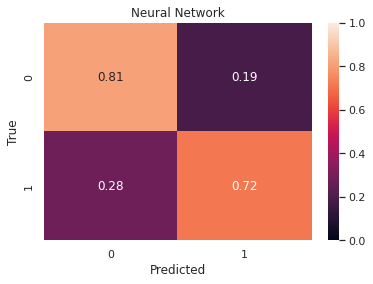

In [80]:
fig, ax = plt.subplots()
cm = confusion_matrix(y_test, y_pred_nn, normalize='true')
sns.heatmap(cm,annot=True, vmin=0, vmax=1, ax=ax)
ax.set(xlabel='Predicted', ylabel='True')
ax.set_title('Neural Network');

In [90]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86     19311
           1       0.51      0.72      0.60      5431

    accuracy                           0.79     24742
   macro avg       0.71      0.76      0.73     24742
weighted avg       0.82      0.79      0.80     24742



The Neural network is performing similarly to the Logistic Regression model, but takes more time to converge. Thus, the best model for the classification of this dataset is Logistic Regression.